# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder , StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV , KFold
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor , StackingRegressor

from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('Regression_StoreSales.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN


In [5]:
df.shape

(14204, 12)

In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [9]:
df.drop_duplicates(keep = 'first' , inplace = True)

In [10]:
df.shape

(14204, 12)

In [11]:
df[df['Item_Outlet_Sales'].isnull()].index.size

5681

In [12]:
df.drop(df[df['Item_Outlet_Sales'].isnull()].index , axis = 0 , inplace = True)

In [13]:
df1 = df.copy()

In [14]:
for i in df1.columns:

  if df1[i].dtypes != 'object' :

    pass

  else:

    df1[i] = LabelEncoder().fit_transform(df1[i])

In [15]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052


In [16]:
df1.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [17]:
df2 = df.copy()

In [18]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [19]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Data Mining

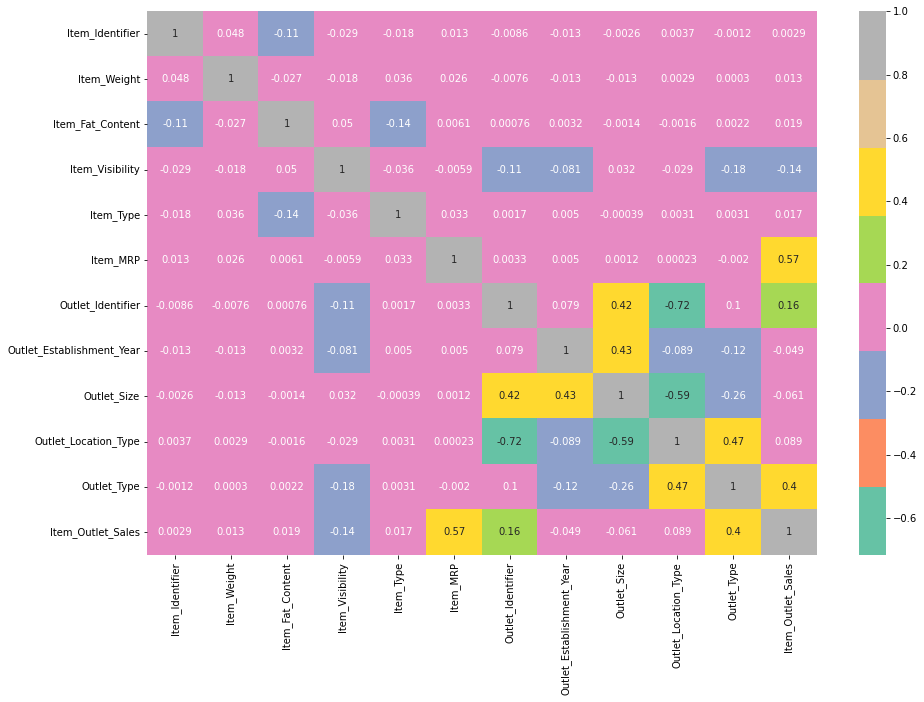

In [20]:
plt.figure(figsize = (15,10))
sns.heatmap(df1.corr() , annot = True , cmap = 'Set2');

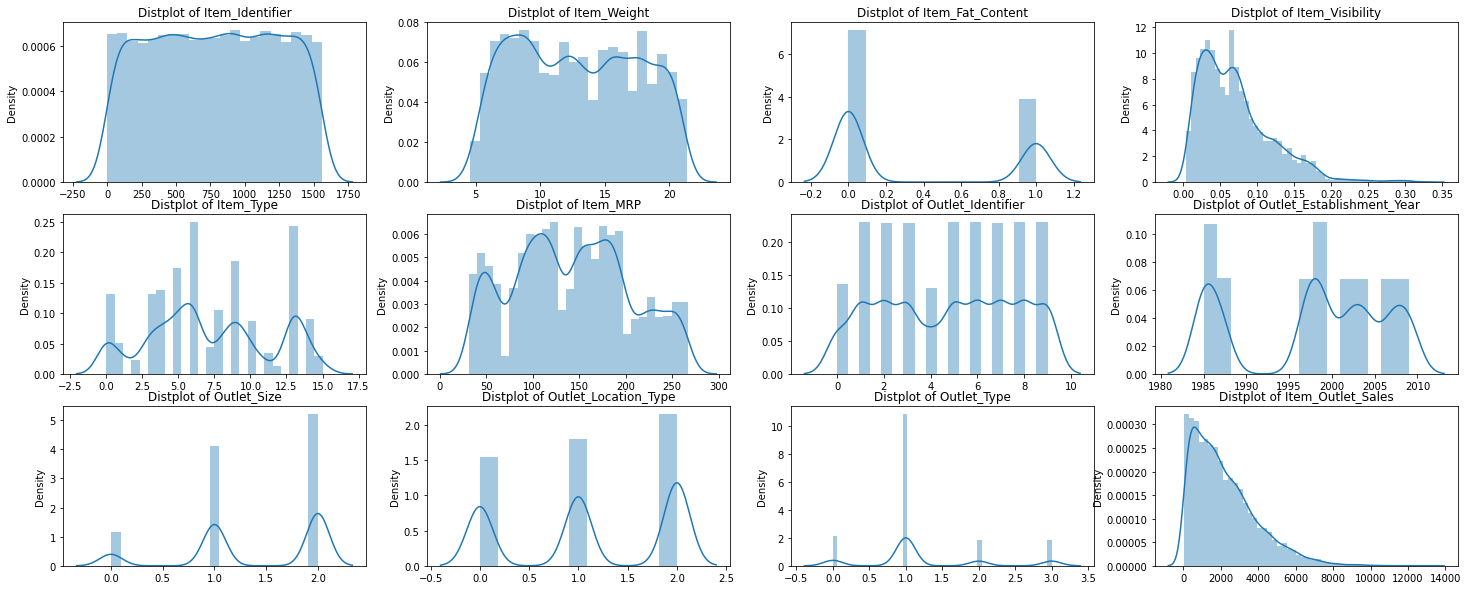

In [21]:
fig , axes = plt.subplots(3,4,figsize=(25,10))
for i ,ax in zip(df1.columns , axes.flatten()):
  sns.distplot(x = df1[i] , ax = ax );
  ax.set_title(f'Distplot of {i}')

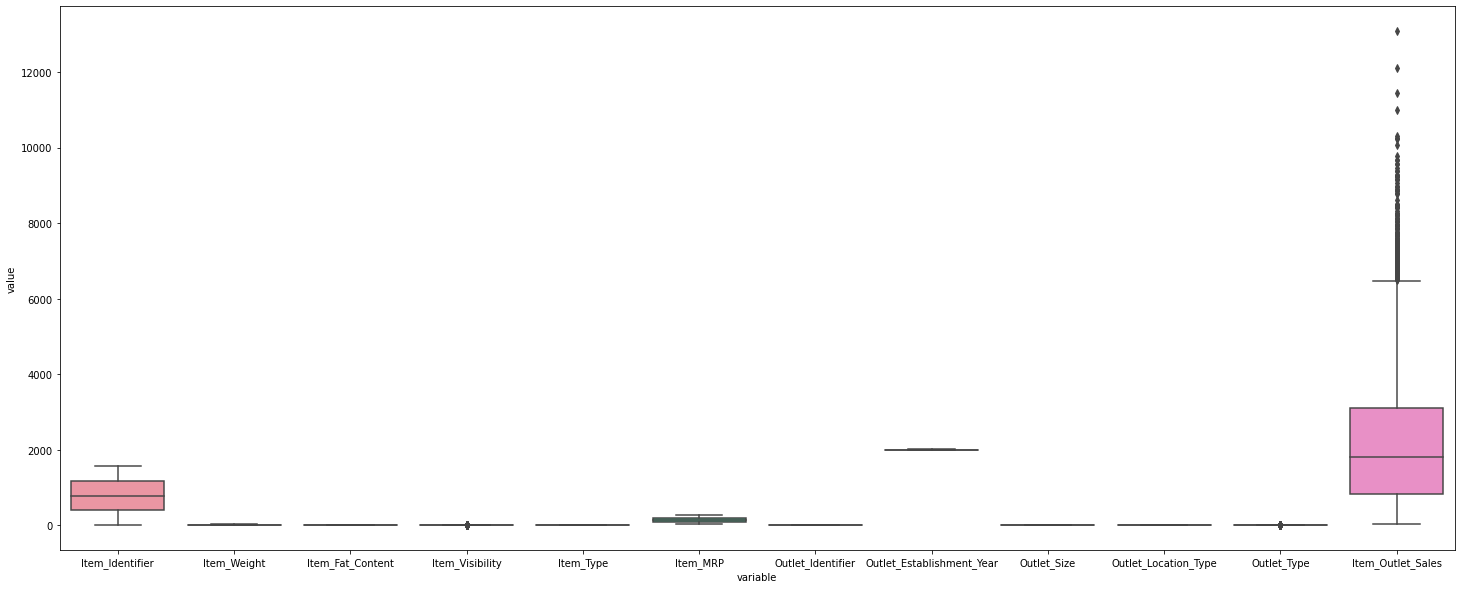

In [22]:
plt.figure(figsize=(25,10))

sns.boxplot(x = 'variable' , y = 'value' , data = pd.melt(df1) );

# EDA

<Figure size 3600x3960 with 0 Axes>

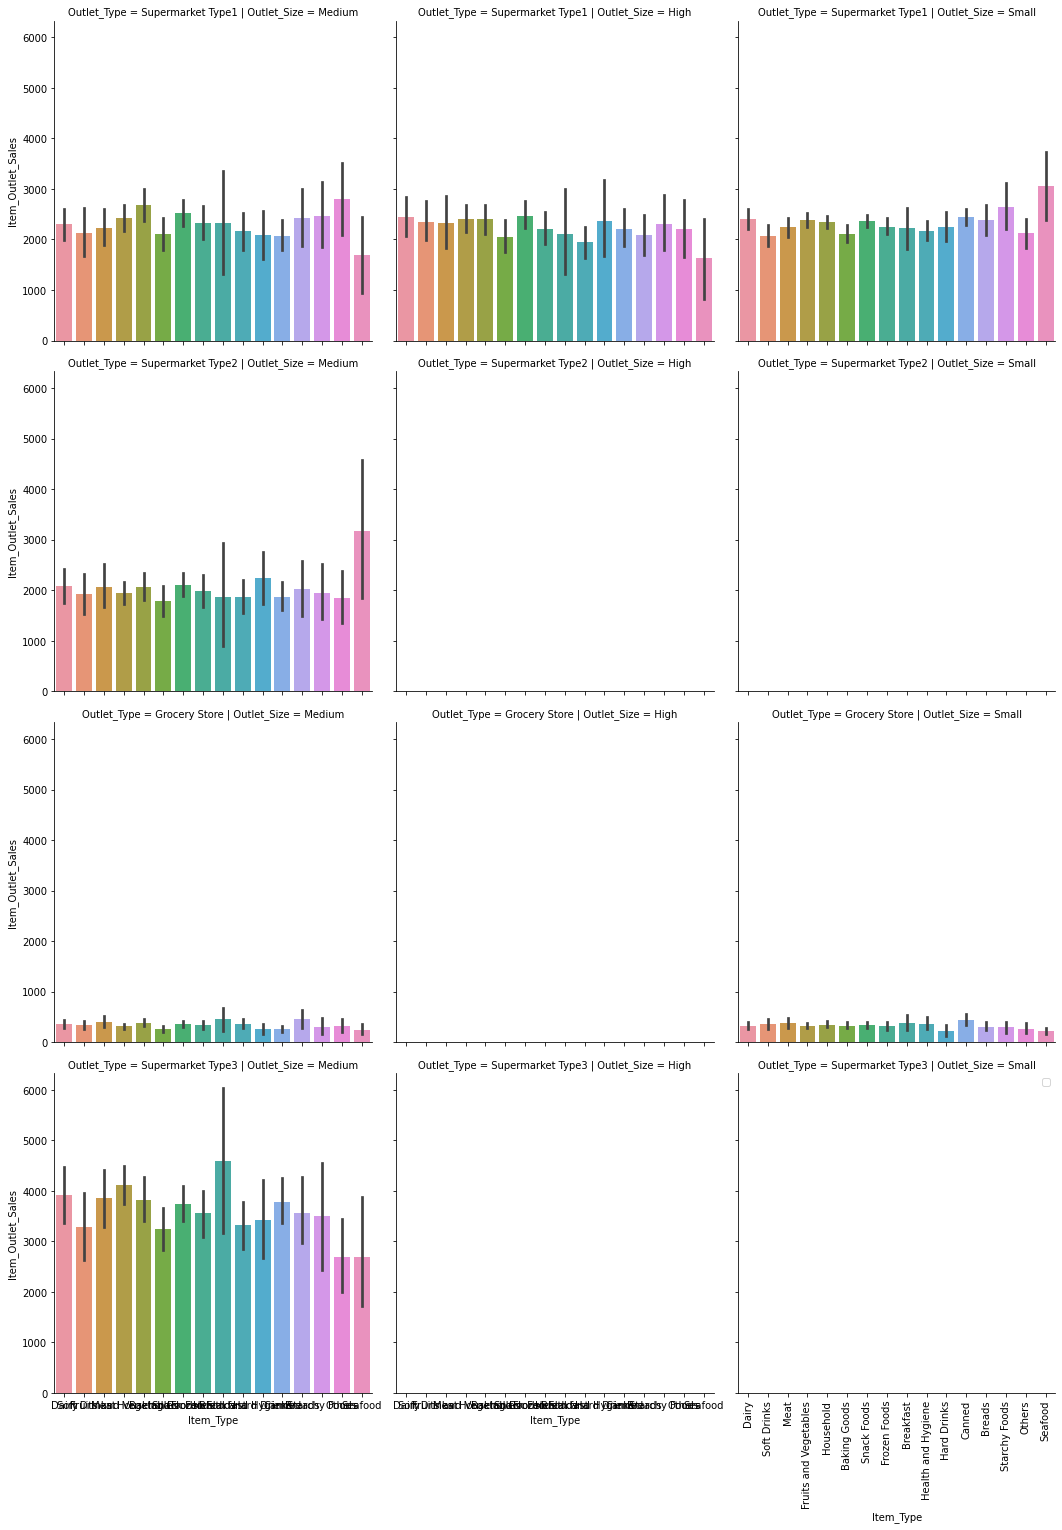

In [23]:
plt.figure(figsize = (50,55))
sns.catplot(data = df , x = 'Item_Type' , y = 'Item_Outlet_Sales' , kind = 'bar' , row = 'Outlet_Type' , col = 'Outlet_Size' , legend_out = True , aspect = 1);
plt.xticks(rotation = 90);
plt.legend()
plt.show()

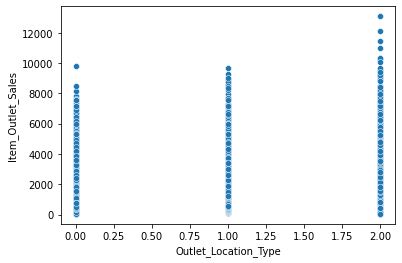

In [24]:
sns.scatterplot(x = df1['Outlet_Location_Type'] , y = df1['Item_Outlet_Sales'] );

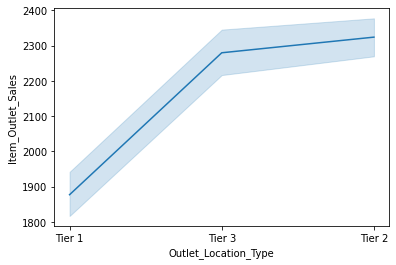

In [25]:
sns.lineplot(x = df['Outlet_Location_Type'] , y = df['Item_Outlet_Sales'])
plt.savefig('6.png')

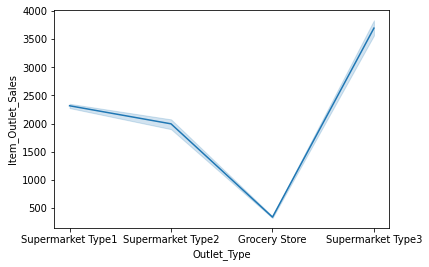

In [26]:
sns.lineplot(x = df['Outlet_Type'] , y = df['Item_Outlet_Sales'])

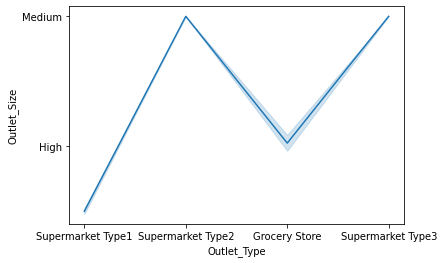

In [27]:
sns.lineplot(x = df['Outlet_Type'] , y = df['Outlet_Size'])
plt.savefig('1.png')

In [28]:
df['Outlet_Size'].value_counts()

Small     4243
Medium    3348
High       932
Name: Outlet_Size, dtype: int64

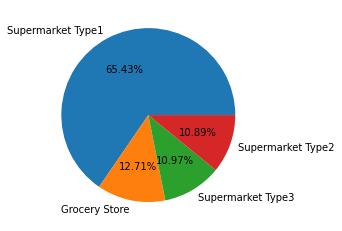

In [29]:
plt.pie(df['Outlet_Type'].value_counts() , labels = df['Outlet_Type'].value_counts().keys() , autopct = '%0.2f%%');
plt.savefig('7.png')

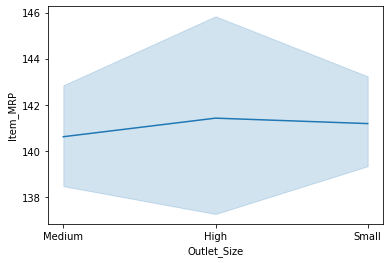

In [30]:
sns.lineplot(x = df['Outlet_Size'] , y = df['Item_MRP'])
plt.savefig('5.png')

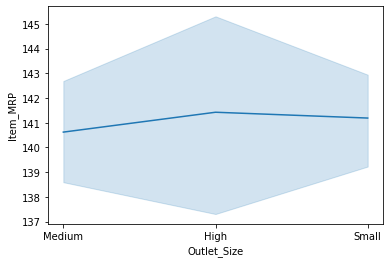

In [31]:
sns.lineplot(x = df['Outlet_Size'] , y = df['Item_MRP'])

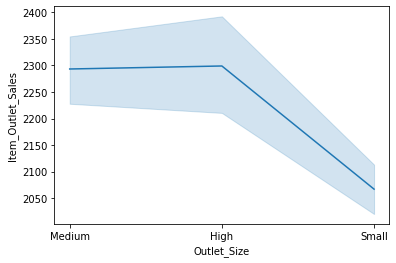

In [32]:
sns.lineplot(x = df['Outlet_Size'] , y = df['Item_Outlet_Sales'])

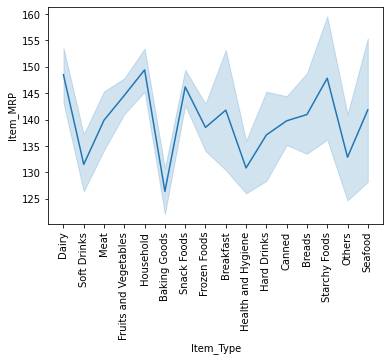

In [33]:
sns.lineplot(x = df['Item_Type'] , y = df['Item_MRP'])
plt.xticks(rotation = 90);
plt.savefig('2.png')

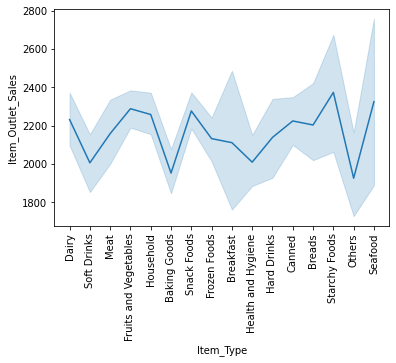

In [34]:
sns.lineplot(x = df['Item_Type'] , y = df['Item_Outlet_Sales'])
plt.xticks(rotation = 90);
plt.savefig('3.png')

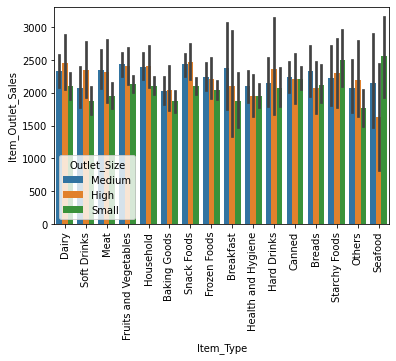

In [35]:
sns.barplot(x = df['Item_Type'] , y = df['Item_Outlet_Sales'] , hue = df['Outlet_Size'])
plt.xticks(rotation = 90);

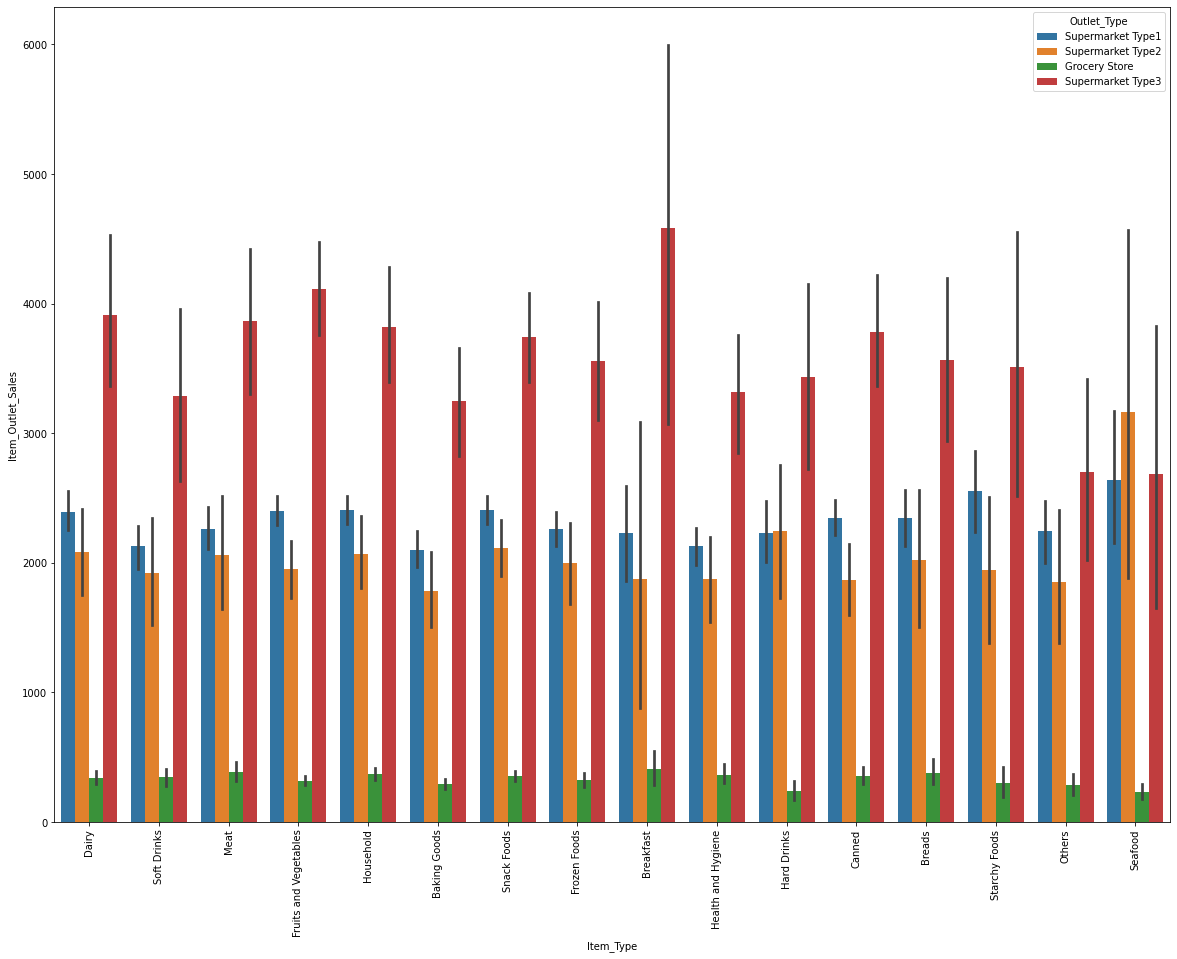

In [36]:
plt.figure(figsize=(20,15))
sns.barplot(x = df['Item_Type'] , y = df['Item_Outlet_Sales'] , hue = df['Outlet_Type'])
plt.xticks(rotation = 90);
plt.savefig('4.png')

In [37]:
df2_dum = pd.get_dummies(df[['Outlet_Type']])
df2_dum.head()

,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [38]:
df3 = pd.concat([df , df2_dum] , axis = 1)

## Feature Selection

In [39]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


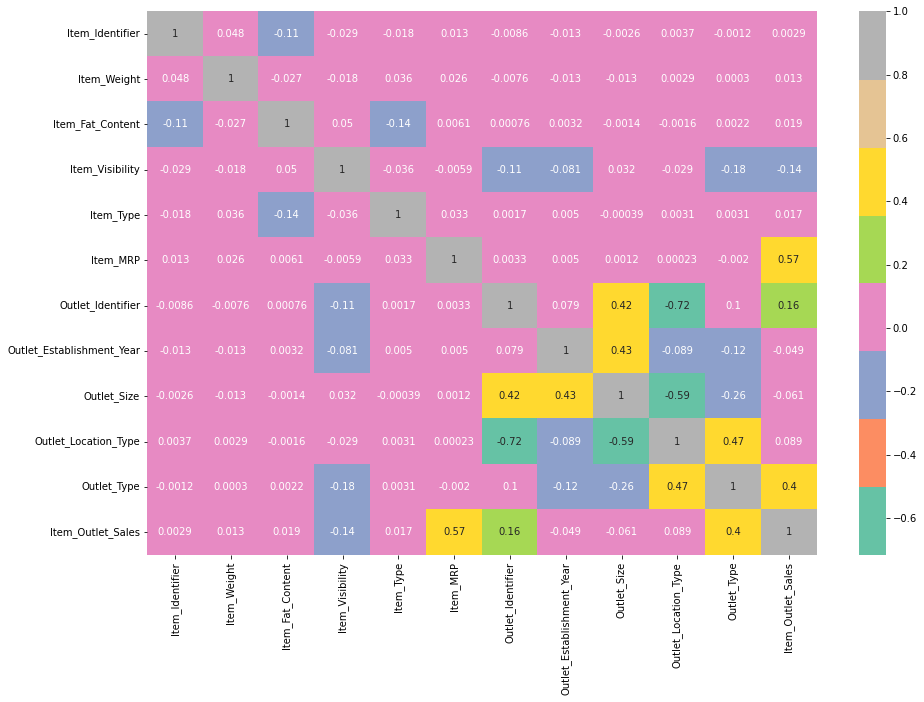

In [40]:
plt.figure(figsize = (15,10))
sns.heatmap(df1.corr() , annot = True , cmap = 'Set2');

In [41]:
df3.drop(columns = ['Item_Identifier' , 'Item_Weight' , 'Item_Fat_Content' , 'Item_Type' , 'Outlet_Establishment_Year' , 'Outlet_Size' , 'Outlet_Type' , 'Outlet_Location_Type'] , inplace = True)
df3.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.016047,249.8092,OUT049,3735.1380,0,1,0,0
1,0.019278,48.2692,OUT018,443.4228,0,0,1,0
2,0.016760,141.6180,OUT049,2097.2700,0,1,0,0
3,0.074402,182.0950,OUT010,732.3800,1,0,0,0
4,0.064299,53.8614,OUT013,994.7052,0,1,0,0


## Feature Transformation (one hot encoding)

In [42]:
df4 = pd.get_dummies(df3['Outlet_Identifier'])
df5 = pd.concat([df3 , df4] , axis = 1)

In [43]:
df5.drop(columns = 'Outlet_Identifier' , inplace = True)
df5.head()

,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,0.016047,249.8092,3735.1380,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0.019278,48.2692,443.4228,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0.016760,141.6180,2097.2700,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0.074402,182.0950,732.3800,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.064299,53.8614,994.7052,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [44]:
df5.shape

(8523, 17)

In [45]:
df5.head()

,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,0.016047,249.8092,3735.1380,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0.019278,48.2692,443.4228,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0.016760,141.6180,2097.2700,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0.074402,182.0950,732.3800,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.064299,53.8614,994.7052,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [46]:
x = df5.drop(columns = 'Item_Outlet_Sales') # independent columns
y = df5['Item_Outlet_Sales']                 # dependent columns

In [47]:
x_col = ['Item_Visibility', 'Item_MRP',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035',
       'OUT045', 'OUT046', 'OUT049']

## Feature Transformation(Scaling)

In [48]:
scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x) , columns = x_col)
x_scaled.head()

,Item_Visibility,Item_MRP,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,0.038399,0.927507,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.048346,0.072068,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.040593,0.468288,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.218055,0.640093,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.186950,0.095805,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train Test Split

In [49]:
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(x_scaled , y , test_size = 0.3 , random_state = 60)

## Cross Val cross for all Models

In [50]:
lr = LinearRegression()
lr.fit( x_train1 , y_train1)

LinearRegression()

In [51]:
cross_score = cross_val_score(lr , x_train1 , y_train1 , cv = 5 , scoring  = 'r2')
cross_score.mean()

0.5533963463994732

In [52]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train1 , y_train1)

DecisionTreeRegressor()

In [53]:
cross_score = cross_val_score(dtr , x_train1 , y_train1 , cv = 5 , scoring  = 'r2')
cross_score.mean()

0.16755343836047315

In [54]:
errorrate = []
for i in range(2,15):
  knn = KNeighborsRegressor(n_neighbors = i)
  knn.fit(x_train1 , y_train1)
  y_predi1 = knn.predict(x_test1)
  errorrate.append(np.mean(y_test1 != y_predi1))
  

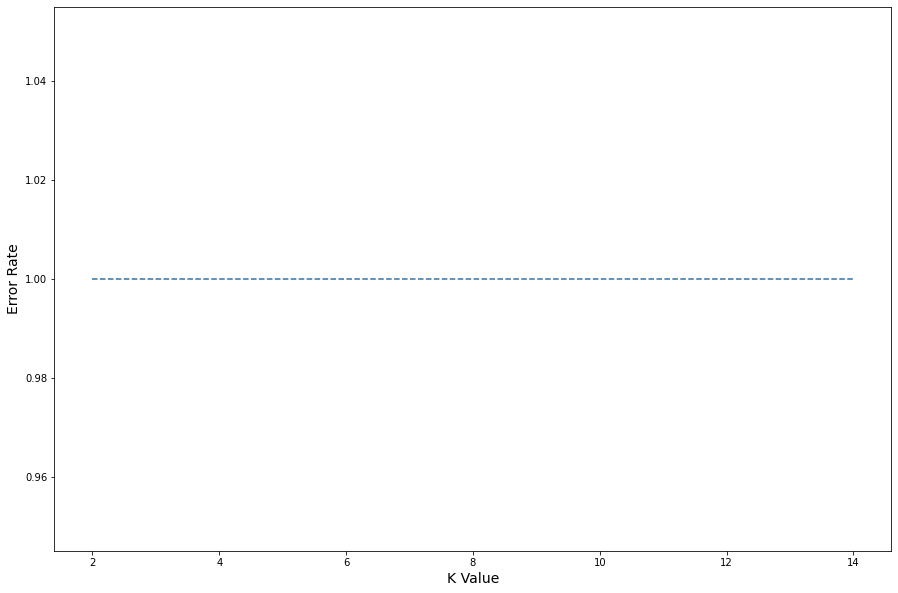

In [55]:
plt.figure(figsize = (15,10))
plt.plot(range(2,15) , errorrate , linestyle = '--')
plt.xlabel('K Value',fontsize = 14)
plt.ylabel('Error Rate',fontsize = 14);

In [56]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(x_train1 ,y_train1)

KNeighborsRegressor(n_neighbors=3)

In [57]:
cross_score = cross_val_score(knn , x_train1 , y_train1 , cv = 5 , scoring  = 'r2')
cross_score.mean()

0.4806437872204773

In [58]:
rfr = RandomForestRegressor()
rfr.fit(x_train1 , y_train1)

RandomForestRegressor()

In [59]:
cross_score = cross_val_score(rfr , x_train1 , y_train1 , cv = 5 , scoring  = 'r2')
cross_score.mean()

0.5435424319043254

In [60]:
ada = AdaBoostRegressor()
ada.fit(x_train1 , y_train1)

AdaBoostRegressor()

In [61]:
cross_score = cross_val_score(ada , x_train1 , y_train1 , cv = 5 , scoring  = 'r2')
cross_score.mean()

0.47512573052323004

## Without Droping features and Label Encoding Them

In [62]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052


In [63]:
x = df1.drop(columns = ['Item_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales']) # independent columns
y = df1['Item_Outlet_Sales']                # Dependent columns

In [64]:
scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x) , columns = x.columns)
x_scaled.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.282525,0.0,0.038399,0.266667,0.927507,1.000000,0.5,0.0,0.333333
1,0.081274,1.0,0.048346,0.933333,0.072068,0.333333,0.5,1.0,0.666667
2,0.770765,0.0,0.040593,0.666667,0.468288,1.000000,0.5,0.0,0.333333
3,0.871986,1.0,0.218055,0.400000,0.640093,0.000000,0.5,1.0,0.000000
4,0.260494,0.0,0.186950,0.600000,0.095805,0.111111,0.0,1.0,0.333333


In [65]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled , y , test_size = 0.3 , random_state = 60)

In [66]:
lr = LinearRegression()
lr.fit( x_train , y_train)
cross_score = cross_val_score(lr , x_train , y_train , cv = 5 , scoring  = 'r2')
cross_score.mean()

0.49283361048440744

In [67]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train , y_train)
cross_score = cross_val_score(dtr , x_train , y_train , cv = 5 , scoring  = 'r2')
cross_score.mean()

0.16208462638282264

In [68]:
errorrate = []
for i in range(2,15):
  knn = KNeighborsRegressor(n_neighbors = i)
  knn.fit(x_train , y_train)
  y_predi = knn.predict(x_test)
  errorrate.append(np.mean(y_test != y_predi))

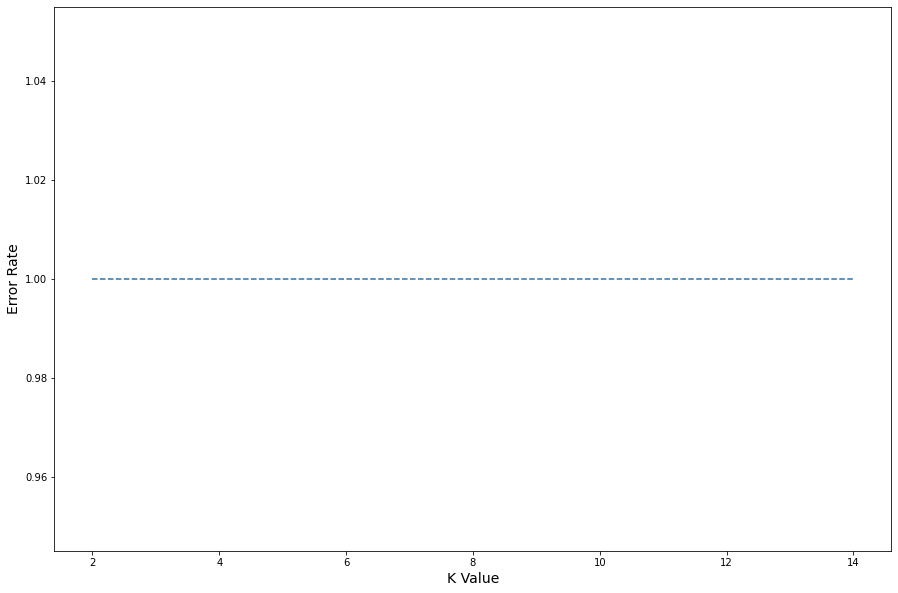

In [69]:
plt.figure(figsize = (15,10))
plt.plot(range(2,15) , errorrate , linestyle = '--')
plt.xlabel('K Value',fontsize = 14)
plt.ylabel('Error Rate',fontsize = 14);

In [70]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(x_train ,y_train)
cross_score = cross_val_score(knn , x_train , y_train , cv = 5 , scoring  = 'r2')
cross_score.mean()

0.4421544582712193

In [71]:
rfr = RandomForestRegressor()
rfr.fit(x_train , y_train)
cross_score = cross_val_score(knn , x_train , y_train , cv = 5 , scoring  = 'r2')
cross_score.mean()

0.4421544582712193

In [72]:
ada = AdaBoostRegressor()
ada.fit(x_train , y_train)
cross_score = cross_val_score(ada , x_train , y_train , cv = 5 , scoring  = 'r2')
cross_score.mean()

0.45533214400782607

## Build Models , Train and evaluate the models

## Linear Regression

In [73]:
lr =LinearRegression()
lr.fit(x_train1 , y_train1)
y_pred_lr = lr.predict(x_test1)
print('Training Performance',lr.score(x_train1 , y_train1))

Training Performance 0.55499880590432


In [74]:
print("MSE of LR \t: ",mean_squared_error(y_test1 , y_pred_lr))
print("MAE of LR \t: ",mean_absolute_error(y_test1 , y_pred_lr))
print("R^2 Score of LR : ",r2_score(y_test1 , y_pred_lr))

MSE of LR 	:  1242173.8477074136
MAE of LR 	:  821.3710290183809
R^2 Score of LR :  0.5812144218620054


## Ridge Regression (L2 Regularization)

In [75]:
ridge = Ridge()
ridge.fit(x_train1 , y_train1)
y_pred_rd = ridge.predict(x_test1)
print('Training Performance',ridge.score(x_train1 , y_train1))

Training Performance 0.5550387231697539


In [76]:
print("MSE of LR \t: ",mean_squared_error(y_test1 , y_pred_rd))
print("MAE of LR \t: ",mean_absolute_error(y_test1 , y_pred_rd))
print("R^2 Score of LR : ",r2_score(y_test1 , y_pred_rd))

MSE of LR 	:  1243102.270908209
MAE of LR 	:  821.3812533366571
R^2 Score of LR :  0.5809014139463908


In [77]:
ridge_cv = Ridge()
params = {'alpha' : [1e-020,1e-015,1e-012,1e-010,0.00000001,0.0000001,0.000001,0.00001,0.0001,0.001,2,4,5,10,15,20,30,40,50,60,70,80,90]}
ridgecv = GridSearchCV(ridge_cv , params , cv = 5 , scoring = 'r2')

In [78]:
ridgecv.fit(x_train1 ,y_train1)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-20, 1e-15, 1e-12, 1e-10, 1e-08, 1e-07,
                                   1e-06, 1e-05, 0.0001, 0.001, 2, 4, 5, 10, 15,
                                   20, 30, 40, 50, 60, 70, 80, 90]},
             scoring='r2')

In [79]:
ridgecv.best_score_

0.5533938229731079

In [80]:
ridgecv.best_params_

{'alpha': 0.001}

In [81]:
y_pred_rdcv = ridgecv.predict(x_test1)

In [82]:
print("MSE of L2 \t: ",mean_squared_error(y_test1 , y_pred_rdcv))
print("MAE of L2 \t: ",mean_absolute_error(y_test1 , y_pred_rdcv))
print("R^2 Score of L2 : ",r2_score(y_test1 , y_pred_rdcv))

MSE of L2 	:  1243022.5660411036
MAE of L2 	:  821.3950759381636
R^2 Score of L2 :  0.5809282855867115


## Lasso Regression (L1 Regularization)

In [83]:
lasso = Lasso()
lasso.fit(x_train1 , y_train1)
y_pred_lss = lasso.predict(x_test1)
print('Training Performance',lasso.score(x_train1 , y_train1))

Training Performance 0.5550067173076632


In [84]:
print("MSE of L1 \t: ",mean_squared_error(y_test1 , y_pred_lss))
print("MAE of L1 \t: ",mean_absolute_error(y_test1 , y_pred_lss))
print("R^2 Score of L1 : ",r2_score(y_test1 , y_pred_lss))

MSE of L1 	:  1243558.8960701316
MAE of L1 	:  821.1431274004537
R^2 Score of L1 :  0.5807474676748758


In [85]:
lasso_cv = Lasso()
params = {'alpha' : [1e-020,1e-015,1e-012,1e-010,0.00000001,0.0000001,0.000001,0.00001,0.0001,0.001,2,4,5,10,15,20,30,40,50,60,70,80,90]}
lassocv = GridSearchCV(lasso_cv , params , cv = 5 , scoring = 'r2')

In [86]:
lassocv.fit(x_train1 ,y_train1)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-20, 1e-15, 1e-12, 1e-10, 1e-08, 1e-07,
                                   1e-06, 1e-05, 0.0001, 0.001, 2, 4, 5, 10, 15,
                                   20, 30, 40, 50, 60, 70, 80, 90]},
             scoring='r2')

In [87]:
lassocv.best_score_

0.5534604152521705

In [88]:
lassocv.best_params_

{'alpha': 2}

In [89]:
y_pred_lsscv = ridgecv.predict(x_test1)

In [90]:
print("MSE of L1 \t: ",mean_squared_error(y_test1 , y_pred_lsscv))
print("MAE of L1 \t: ",mean_absolute_error(y_test1 , y_pred_lsscv))
print("R^2 Score of L1 : ",r2_score(y_test1 , y_pred_lsscv))

MSE of L1 	:  1243022.5660411036
MAE of L1 	:  821.3950759381636
R^2 Score of L1 :  0.5809282855867115


## Decision Tree

In [91]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train1 , y_train1)
y_pred_dtr = dtr.predict(x_test1)
print('Training Performance',dtr.score(x_train1 , y_train1))

Training Performance 1.0


In [92]:
print("MSE of dtr \t: ",mean_squared_error(y_test1 , y_pred_dtr))
print("MAE of dtr     \t: ",mean_absolute_error(y_test1 , y_pred_dtr))
print("R^2 Score of dtr : ",r2_score(y_test1 , y_pred_dtr))

MSE of dtr 	:  2333966.096422727
MAE of dtr     	:  1051.756474540477
R^2 Score of dtr :  0.2131283854922229


In [93]:
kf = KFold(n_splits = 10 , shuffle = True , random_state = 60)

In [94]:
params = {'max_depth' : range(4,10) , 'criterion' : ['mse','mae']}

In [95]:
dtr_gridcv = DecisionTreeRegressor()
dtr_gridcv = GridSearchCV(estimator = dtr_gridcv , param_grid = params , cv =kf , scoring = 'r2')

In [96]:
dtr_gridcv.fit(x_train1 , y_train1)

GridSearchCV(cv=KFold(n_splits=10, random_state=60, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': range(4, 10)},
             scoring='r2')

In [97]:
dtr_gridcv.best_score_

0.5759638697942875

In [98]:
dtr_gridcv.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=5)

In [99]:
y_pred_gridcv = dtr_gridcv.predict(x_test1)

In [100]:
print("MSE of Dtr_cv \t: ",mean_squared_error(y_test1 , y_pred_gridcv))
print("MAE of Dtr_cv \t: ",mean_absolute_error(y_test1 , y_pred_gridcv))
print("R^2 Score of Dtr_cv : ",r2_score(y_test1 , y_pred_gridcv))

MSE of Dtr_cv 	:  1132944.6110800048
MAE of Dtr_cv 	:  743.1403677694846
R^2 Score of Dtr_cv :  0.6180398864256065


In [101]:
cross_score = cross_val_score(dtr_gridcv , x_train1 , y_train1 , cv = 5 , scoring  = 'r2')
cross_score.mean()

0.5766080636807379

## Ensemble - Random Forest (Bagging)

In [102]:
rf = RandomForestRegressor(random_state = 60)
rf.fit(x_train1 , y_train1)
y_pred_rf = rf.predict(x_test1)
print('Training Performance',dtr.score(x_train1 , y_train1))

Training Performance 1.0


In [103]:
print("MSE of rf \t: ",mean_squared_error(y_test1 , y_pred_rf))
print("MAE of rf     \t: ",mean_absolute_error(y_test1 , y_pred_rf))
print("R^2 Score of rf : ",r2_score(y_test1 , y_pred_rf))

MSE of rf 	:  1296202.6600234038
MAE of rf     	:  793.3996977160734
R^2 Score of rf :  0.5629991877837635


In [104]:
kf = KFold(n_splits = 10 , shuffle = True , random_state = 60)

In [105]:
params = {'max_depth' : [2,3,5,10] , 'min_samples_leaf' : [10,15,20,50] , 'n_estimators' : [10,20,30,50]}

In [106]:
rf_grid = RandomForestRegressor(random_state = 60)
gridcv = GridSearchCV(estimator = rf_grid , param_grid = params , cv =kf , scoring = 'r2')

In [107]:
gridcv.fit(x_train1 , y_train1)

GridSearchCV(cv=KFold(n_splits=10, random_state=60, shuffle=True),
             estimator=RandomForestRegressor(random_state=60),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [10, 15, 20, 50],
                         'n_estimators': [10, 20, 30, 50]},
             scoring='r2')

In [108]:
gridcv.best_score_

0.5839589156033572

In [109]:
gridcv.best_estimator_

RandomForestRegressor(max_depth=5, min_samples_leaf=20, n_estimators=50,
                      random_state=60)

In [110]:
y_pred_gridcv1 = gridcv.predict(x_test1)

In [111]:
print("MSE of Dtr_cv \t: ",mean_squared_error(y_test1 , y_pred_gridcv1))
print("MAE of Dtr_cv \t: ",mean_absolute_error(y_test1 , y_pred_gridcv1))
print("R^2 Score of Dtr_cv : ",r2_score(y_test1 , y_pred_gridcv1))

MSE of Dtr_cv 	:  1117025.4729159493
MAE of Dtr_cv 	:  736.9987486184649
R^2 Score of Dtr_cv :  0.6234068529672034


In [112]:
cross_score = cross_val_score(gridcv , x_train , y_train , cv = 5 , scoring  = 'r2')
cross_score.mean()

0.584601410917349

## Stacking Regressor

In [113]:
from sklearn.metrics import SCORERS

In [114]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [115]:
ada = AdaBoostRegressor()
params = {'loss' : ['linear' , 'square', 'exponential'] , 'n_estimators' : [10,20,30,50]}
ada_grid = GridSearchCV(estimator = ada , param_grid = params , cv = kf , scoring = 'r2')
ada_grid.fit(x_train1 , y_train1)

GridSearchCV(cv=KFold(n_splits=10, random_state=60, shuffle=True),
             estimator=AdaBoostRegressor(),
             param_grid={'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [10, 20, 30, 50]},
             scoring='r2')

In [116]:
ada_grid.best_params_

{'loss': 'exponential', 'n_estimators': 10}

In [117]:
ada_grid.best_score_

0.5437036479236761

In [118]:
def get_stacking():
    #base models
    base = list()

    base.append(('ada', AdaBoostRegressor(loss = 'exponential' , n_estimators = 10)))
    base.append(('rfr', RandomForestRegressor(max_depth=5, min_samples_leaf=20, n_estimators=50,
                      random_state=60)))
    
    
    #meta model
    meta = LinearRegression()
    
    #stacking ensemble'
    sr = StackingRegressor(estimators=base,final_estimator=meta,cv=5)
    return sr

In [119]:
model1 = get_stacking()

In [120]:
CS_Score = cross_val_score(model1 , x_train1 , y_train1 , cv = kf , scoring = 'r2')
CS_Score

array([0.57109733, 0.58864319, 0.57983327, 0.57647153, 0.62455395,
       0.57771413, 0.57938798, 0.56197592, 0.57240177, 0.61224317])

In [121]:
CS_Score.mean()

0.5844322239142686

In [122]:
model1.fit(x_train1 , y_train1)
y_pred_stack = model1.predict(x_test1)
print('Training Performance : ',model1.score(x_train1 , y_train1))

Training Performance :  0.5993299690929577


In [123]:
print("MSE of stcking_model \t: ",mean_squared_error(y_test1 , y_pred_stack))
print("MAE of stcking_model \t: ",mean_absolute_error(y_test1 , y_pred_stack))
print("R^2 Score of stcking_model : ",r2_score(y_test1 , y_pred_stack))

MSE of stcking_model 	:  1117893.9817650248
MAE of stcking_model 	:  737.7556882017232
R^2 Score of stcking_model :  0.6231140445320965


In [124]:
CS_Score = cross_val_score(model1 , x_train1 , y_train1 , cv = kf , scoring = 'r2')
CS_Score

array([0.57005995, 0.58831385, 0.57973885, 0.57586785, 0.62464613,
       0.57715338, 0.57799046, 0.56240146, 0.57242682, 0.61153038])

In [125]:
CS_Score.mean()

0.5840129136140725

In [126]:
def get_stacking():
    #base models
    base = list()
    base.append(('ada1', AdaBoostRegressor()))
    base.append(('ada2', AdaBoostRegressor()))
    base.append(('rfr1', RandomForestRegressor()))
    base.append(('rfr2', RandomForestRegressor()))
    
    #meta model

    meta = LinearRegression()
    
    #stacking ensemble'
    sr = StackingRegressor(estimators=base,final_estimator=meta,cv=5)
    return sr

In [127]:
model3 = get_stacking()

In [128]:
CS_Score = cross_val_score(model3 , x_train1 , y_train1 , cv = kf , scoring = 'r2')
CS_Score

array([0.54647615, 0.55943598, 0.54913285, 0.52468395, 0.60696004,
       0.57505755, 0.53673999, 0.5519224 , 0.52225758, 0.59702831])

In [129]:
CS_Score.mean()

0.556969481585971

## Multi Layer Stacking 

In [130]:
pip install scikeras[tensorflow]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 96.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 40.1 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorboard
    Found existing i

In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [132]:
# define base model
def baseline_model():

 # create model
 model = Sequential()
 model.add(Dense(13, input_shape=(16,), kernel_initializer='normal', activation='relu'))
 model.add(Dense(6, input_shape=(16,), kernel_initializer='normal', activation='relu'))
 model.add(Dense(1, kernel_initializer='normal'))

 # Compile model
 model.compile(loss='mean_squared_error', optimizer='adam' , metrics=['mse','mae'])
 return model

In [133]:
estimator = KerasRegressor(model=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, x_train1 , y_train1, cv=kfold, scoring='r2')
print("Baseline: %.2f  R^2 Score" % (results.mean()))

Baseline: 0.58  R^2 Score


In [134]:
estimator.fit(x_train1 , y_train1)
y_pred_adam = estimator.predict(x_test1)
print('Training Performance',estimator.score(x_train1 , y_train1))

Training Performance 0.5872721175921162


In [135]:
print("MSE of Multi_stcking_model \t: ",mean_squared_error(y_test1 , y_pred_adam))
print("MAE of Multi_stcking_model \t: ",mean_absolute_error(y_test1 , y_pred_adam))
print("R^2 Score of Multi_stcking_model : ",r2_score(y_test1 , y_pred_adam))

MSE of Multi_stcking_model 	:  1140892.0003761607
MAE of Multi_stcking_model 	:  744.2557688624102
R^2 Score of Multi_stcking_model :  0.6153605094388657


# Model Comparision

In [136]:
from tabulate import tabulate

tabel = [['Linear Regression' , 0.55 , 1242173.84  , 821.37 , 0.58 , 0.55] , 
               ['Ridge Regressor' , 0.55 , 1243102.27 , 821.38 , 0.58 ,0.58] ,
               ['Lasso Regressor' , 0.55 , 1243558.89 , 821.14 , 0.58 , 0.58] ,
               ['Decision Tree Regressor' , 0.57 , 1132944.61 , 743.14 , 0.61 , 0.57] , 
               ['Random Forest Regressor' , 0.58 , 1117025.47 , 736.99 , 0.62 , 0.58],
               ['Stacking Regressor' , 0.59 , 1116559.00 , 736.93 , 0.62 ,0.58] ,
               ['Multi-Layer Stacking' , 0.58 , 1132359.36 , 741.81 , 0.61 , 0.59]]

print(tabulate( tabel , headers = ['Models' , 'Training Performance' , 'MSE' , 'MAE' , 'R^2 Score' , 'Evaluation (Cross Validation Score)'] , tablefmt = 'grid'))

+-------------------------+------------------------+-------------+--------+-------------+---------------------------------------+
| Models                  |   Training Performance |         MSE |    MAE |   R^2 Score |   Evaluation (Cross Validation Score) |
+=========================+========================+=============+========+=============+=======================================+
| Linear Regression       |                   0.55 | 1.24217e+06 | 821.37 |        0.58 |                                  0.55 |
+-------------------------+------------------------+-------------+--------+-------------+---------------------------------------+
| Ridge Regressor         |                   0.55 | 1.2431e+06  | 821.38 |        0.58 |                                  0.58 |
+-------------------------+------------------------+-------------+--------+-------------+---------------------------------------+
| Lasso Regressor         |                   0.55 | 1.24356e+06 | 821.14 |        0.58 | 

In [137]:
tabel2 = [['Linear Regression' , 0.55 , 1242173.84  , 821.37 , 0.58 , 0.55] , 
               ['Decision Tree Regressor' , 0.57 , 1132944.61 , 743.14 , 0.61 , 0.57], 
               ['Stacking Regressor' , 0.59 , 1116559.00 , 736.93 , 0.62 ,0.58] ,
               ['Multi-Layer Stacking' , 0.58 , 1132359.36 , 741.81 , 0.61 , 0.59]]

print(tabulate( tabel2 , headers = ['Models' , 'Training Performance' , 'MSE' , 'MAE' , 'R^2 Score' , 'Evaluation (Cross Validation Score)'] , tablefmt = 'grid'))

+-------------------------+------------------------+-------------+--------+-------------+---------------------------------------+
| Models                  |   Training Performance |         MSE |    MAE |   R^2 Score |   Evaluation (Cross Validation Score) |
+=========================+========================+=============+========+=============+=======================================+
| Linear Regression       |                   0.55 | 1.24217e+06 | 821.37 |        0.58 |                                  0.55 |
+-------------------------+------------------------+-------------+--------+-------------+---------------------------------------+
| Decision Tree Regressor |                   0.57 | 1.13294e+06 | 743.14 |        0.61 |                                  0.57 |
+-------------------------+------------------------+-------------+--------+-------------+---------------------------------------+
| Stacking Regressor      |                   0.59 | 1.11656e+06 | 736.93 |        0.62 | 

In [138]:
res = []
for i in [y_pred_lr , y_pred_gridcv , y_pred_stack , y_pred_adam]:
  res.append([r2_score(y_test1 , i)])

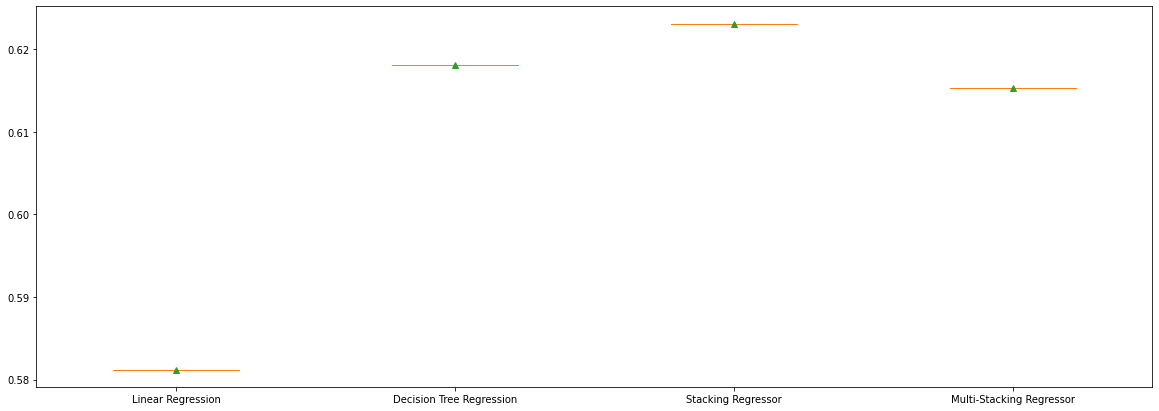

In [139]:
plt.figure(figsize=(20,7))
plt.boxplot(res , showmeans=True)
plt.xticks([1,2,3,4],['Linear Regression' , 'Decision Tree Regression' , 'Stacking Regressor' , 'Multi-Stacking Regressor'])
plt.savefig('11')
plt.show()

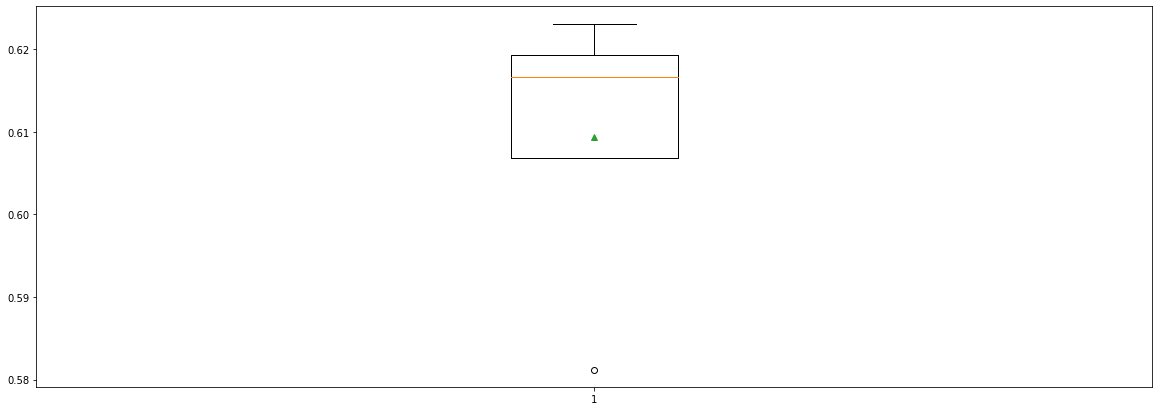

In [140]:
plt.figure(figsize=(20,7))
plt.boxplot([r2_score(y_test1 , y_pred_lr) , r2_score(y_test1 , y_pred_gridcv) , r2_score(y_test1 , y_pred_stack) , r2_score(y_test1 , y_pred_adam)], showmeans=True)
plt.show()

# Predicting Output by giving input

In [141]:
from ipywidgets import interact , FloatText
import ipywidgets as widgets

In [142]:
a = []
for i in x_test1.columns:
  n1 = float(input(f"Enter {i} : "))
  a.append(n1)

b = np.array([]).reshape(1,-1)
c = np.append(b,a).reshape(1,-1)
c
model1.predict(c)

Enter Item_Visibility : 0.0162213
Enter Item_MRP : 0.123651
Enter Outlet_Type_Grocery Store : 0
Enter Outlet_Type_Supermarket Type1 : 1
Enter Outlet_Type_Supermarket Type2 : 0
Enter Outlet_Type_Supermarket Type3 : 0
Enter OUT010 : 0
Enter OUT013 : 0
Enter OUT017 : 0
Enter OUT018 : 0
Enter OUT019 : 0
Enter OUT027 : 0
Enter OUT035 : 0
Enter OUT045 : 1
Enter OUT046 : 0
Enter OUT049 : 0


array([938.72293372])

In [143]:
len(x_test1.columns)

16

In [144]:
def pred(x1,x2,x3,y1,y2,y3,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10):
  
  l = np.array([x1,x2,x3,y1,y2,y3,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10]).reshape(1,-1)
  print(model1.predict(l))

style = {'description_width': '250px'}
layout = widgets.Layout(width='500px')

i = interact(pred , x1 = FloatText(description = 'Item_Visibility' , style = style , layout = layout ,readout=True),
              x2 = FloatText(description = 'Item_MRP' , style = style , layout = layout ,readout=True),
             
              x3 = widgets.SelectionSlider(description = 'Outlet_Type_Grocery Store' , options = [0,1], style = style , layout = layout,readout=True),
              y1 = widgets.SelectionSlider(description = 'Outlet_Type_Supermarket Type1' , options = [0,1], style = style , layout = layout,readout=True),
              y2 = widgets.SelectionSlider(description = 'Outlet_Type_Supermarket Type2' , options = [0,1], style = style , layout = layout,readout=True),
              y3 = widgets.SelectionSlider(description = 'Outlet_Type_Supermarket Type3' , options = [0,1], style = style , layout = layout,readout=True),
                        
              z1 = widgets.SelectionSlider(description = 'OUT010' , options = [0,1], style = style , layout = layout,readout=True),
              z2 = widgets.SelectionSlider(description = 'OUT013' , options = [0,1], style = style , layout = layout,readout=True),
              z3 = widgets.SelectionSlider(description = 'OUT017' , options = [0,1], style = style , layout = layout,readout=True),
              z4 = widgets.SelectionSlider(description = 'OUT018' , options = [0,1], style = style , layout = layout,readout=True),

              z5 = widgets.SelectionSlider(description = 'OUT019' , options = [0,1], style = style , layout = layout,readout=True),
              z6 = widgets.SelectionSlider(description = 'OUT027' , options = [0,1], style = style , layout = layout,readout=True),
              z7 = widgets.SelectionSlider(description = 'OUT035' , options = [0,1], style = style , layout = layout,readout=True),
              z8 = widgets.SelectionSlider(description = 'OUT045' , options = [0,1], style = style , layout = layout,readout=True),

              z9 = widgets.SelectionSlider(description = 'OUT046' , options = [0,1], style = style , layout = layout,readout=True),
              z10 = widgets.SelectionSlider(description = 'OUT049' , options = [0,1], style = style , layout = layout,readout=True))


interactive(children=(FloatText(value=0.0, description='Item_Visibility', layout=Layout(width='500px'), style=…

In [145]:
# k = pd.DataFrame(['No','Yes','No','Yes'])
# kk = LabelEncoder()
# kk.fit_transform(k)

In [146]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [167]:
df6 = df.drop(columns = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 
       'Item_Type',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Item_Outlet_Sales'])

df6.head()
df.iloc[-1]

Item_Identifier                          DRG01
Item_Weight                               14.8
Item_Fat_Content                       Low Fat
Item_Visibility                       0.044878
Item_Type                          Soft Drinks
Item_MRP                                75.467
Outlet_Identifier                       OUT046
Outlet_Establishment_Year                 1997
Outlet_Size                              Small
Outlet_Location_Type                    Tier 1
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                       765.67
Name: 8522, dtype: object

In [148]:
# from sklearn.preprocessing import OneHotEncoder

In [168]:
df_new = pd.read_csv('/content/Regression_StoreSales.csv')
df_new.drop(columns = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 
       'Item_Type',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Item_Outlet_Sales'] , inplace = True )
df_new['Outlet_Type'].unique()
df_new.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Type
0,0.016047,249.8092,OUT049,Supermarket Type1
1,0.019278,48.2692,OUT018,Supermarket Type2
2,0.016760,141.6180,OUT049,Supermarket Type1
3,0.074402,182.0950,OUT010,Grocery Store
4,0.064299,53.8614,OUT013,Supermarket Type1


In [174]:
def pred(a1,b1,c1,d1):
  df_new.loc[len(df6.index)]= [a1,b1,c1,d1]
  df7 = pd.get_dummies(df_new , columns = ['Outlet_Identifier' , 'Outlet_Type'])
  
  df7.drop(columns = ['Outlet_Type_Grocery Store'] , inplace = True)
  global df8_scaled
  df8_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df7) , columns = df7.columns)
  print(model1.predict(df8_scaled.iloc[-1].to_numpy().reshape(1,-1)))

style = {'description_width': '250px'}
layout = widgets.Layout(width='500px')

i = interact(pred , a1 = FloatText(description = 'Item_Visibility' , style = style , layout = layout ,readout=True),
              b1 = FloatText(description = 'Item_MRP' , style = style , layout = layout ,readout=True),
             
             c1 = widgets.Dropdown(description = 'Outlet_Identifier' , options = ['OUT010', 'OUT013', 'OUT017', 'OUT018',
       'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049'], style = style , layout = layout ,readout=True) ,

            d1 = widgets.Dropdown(description = 'Outlet_Type' , options = ['Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], style = style , layout = layout ,readout=True))


interactive(children=(FloatText(value=0.0, description='Item_Visibility', layout=Layout(width='500px'), style=…

In [176]:
# def pred(x1,x2,x3,y1,y2,y3,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10):

#   l = np.array([x1,x2,x3,y1,y2,y3,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10]).reshape(1,-1)
#   print(model1.predict(l))

# style = {'description_width': '250px'}
# layout = widgets.Layout(width='500px')

# i = interact(pred , x1 = FloatText(description = 'Item_Visibility' , style = style , layout = layout ,readout=True),
#               x2 = FloatText(description = 'Item_MRP' , style = style , layout = layout ,readout=True),
             
#               x3 = widgets.SelectionSlider(description = 'Outlet_Type_Grocery Store' , options = [0,1], style = style , layout = layout,readout=True),
#               y1 = widgets.SelectionSlider(description = 'Outlet_Type_Supermarket Type1' , options = [0,1], style = style , layout = layout,readout=True),
#               y2 = widgets.SelectionSlider(description = 'Outlet_Type_Supermarket Type2' , options = [0,1], style = style , layout = layout,readout=True),
#               y3 = widgets.SelectionSlider(description = 'Outlet_Type_Supermarket Type3' , options = [0,1], style = style , layout = layout,readout=True),
                        
#               z1 = widgets.SelectionSlider(description = 'OUT010' , options = [0,1], style = style , layout = layout,readout=True),
#               z2 = widgets.SelectionSlider(description = 'OUT013' , options = [0,1], style = style , layout = layout,readout=True),
#               z3 = widgets.SelectionSlider(description = 'OUT017' , options = [0,1], style = style , layout = layout,readout=True),
#               z4 = widgets.SelectionSlider(description = 'OUT018' , options = [0,1], style = style , layout = layout,readout=True),

#               z5 = widgets.SelectionSlider(description = 'OUT019' , options = [0,1], style = style , layout = layout,readout=True),
#               z6 = widgets.SelectionSlider(description = 'OUT027' , options = [0,1], style = style , layout = layout,readout=True),
#               z7 = widgets.SelectionSlider(description = 'OUT035' , options = [0,1], style = style , layout = layout,readout=True),
#               z8 = widgets.SelectionSlider(description = 'OUT045' , options = [0,1], style = style , layout = layout,readout=True),

#               z9 = widgets.SelectionSlider(description = 'OUT046' , options = [0,1], style = style , layout = layout,readout=True),
#               z10 = widgets.SelectionSlider(description = 'OUT049' , options = [0,1], style = style , layout = layout,readout=True))


In [155]:
x_test1.head()

,Item_Visibility,Item_MRP,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
2075,0.034109,0.217043,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4414,0.305084,0.837634,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
694,0.200205,0.704957,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
673,0.153776,0.102305,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4185,0.177358,0.565635,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [156]:
y_pred_stack

array([1347.75303651, 3771.96516491, 5382.71086044, ..., 3112.5366927 ,
       2676.76649359, 2327.61051553])

In [157]:
tabel3 = np.array([1,2,'AdaBoost Regressor' , 'Random Forest Regressor' , 'exponential' , 'nan' , 10 , 50 , 'nan' , 5 , 'nan' , 20]).reshape(2,6,order = 'F')
print(tabulate( tabel3 , headers = ['Stacking Regressor','loss' ,'n_estimators' ,'max_depth' , 'min_samples_leaf'] , tablefmt = 'grid'))

+----+-------------------------+-------------+----------------+-------------+--------------------+
|    | Stacking Regressor      | loss        |   n_estimators |   max_depth |   min_samples_leaf |
+====+=========================+=============+================+=============+====================+
|  1 | AdaBoost Regressor      | exponential |             10 |         nan |                nan |
+----+-------------------------+-------------+----------------+-------------+--------------------+
|  2 | Random Forest Regressor | nan         |             50 |           5 |                 20 |
+----+-------------------------+-------------+----------------+-------------+--------------------+


In [158]:
df5.head()

,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,0.016047,249.8092,3735.1380,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0.019278,48.2692,443.4228,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0.016760,141.6180,2097.2700,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0.074402,182.0950,732.3800,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.064299,53.8614,994.7052,0,1,0,0,0,1,0,0,0,0,0,0,0,0


# Interpretation
🠊 Stacking Regressor is performing Well than other model as Highest R^2 Score  and less Residual errors.

     🠊 Base Model : 1) AdaBoost Regressor
                    2) Random Forest Regressor
              
     🠊 Meta Model : 1) Linear Regression

🠊 Hyper parameter used for Base Model of stacking is tabulated above.

🠊 Performance of Multiple Layer Stacking can be increased, if we increase more Hidden layes in Multiple Stacking Classifiers and by doing Hyper parameter tuning over activation optimizers and loss function.

In [159]:
y2_test2 = y_test1.copy()

In [160]:
y2_pred2 = y_pred_stack.copy()

In [161]:
fin = pd.DataFrame({'Actual' : y2_test2 , 'Predicted' : y2_pred2})
fin

,Actual,Predicted
2075,749.0250,1347.753037
4414,3435.5280,3771.965165
694,7488.9184,5382.710860
673,1471.4180,799.049883
4185,1644.5260,2628.706642
...,...,...
4390,683.1108,1908.210905
5273,3279.0650,3565.035606
5533,2182.4924,3112.536693
7473,1838.2738,2676.766494


In [162]:
fin2 = fin.copy()

In [163]:
fin2['Difference'] = y2_test2 - y2_pred2

In [164]:
fin2

,Actual,Predicted,Difference
2075,749.0250,1347.753037,-598.728037
4414,3435.5280,3771.965165,-336.437165
694,7488.9184,5382.710860,2106.207540
673,1471.4180,799.049883,672.368117
4185,1644.5260,2628.706642,-984.180642
...,...,...,...
4390,683.1108,1908.210905,-1225.100105
5273,3279.0650,3565.035606,-285.970606
5533,2182.4924,3112.536693,-930.044293
7473,1838.2738,2676.766494,-838.492694


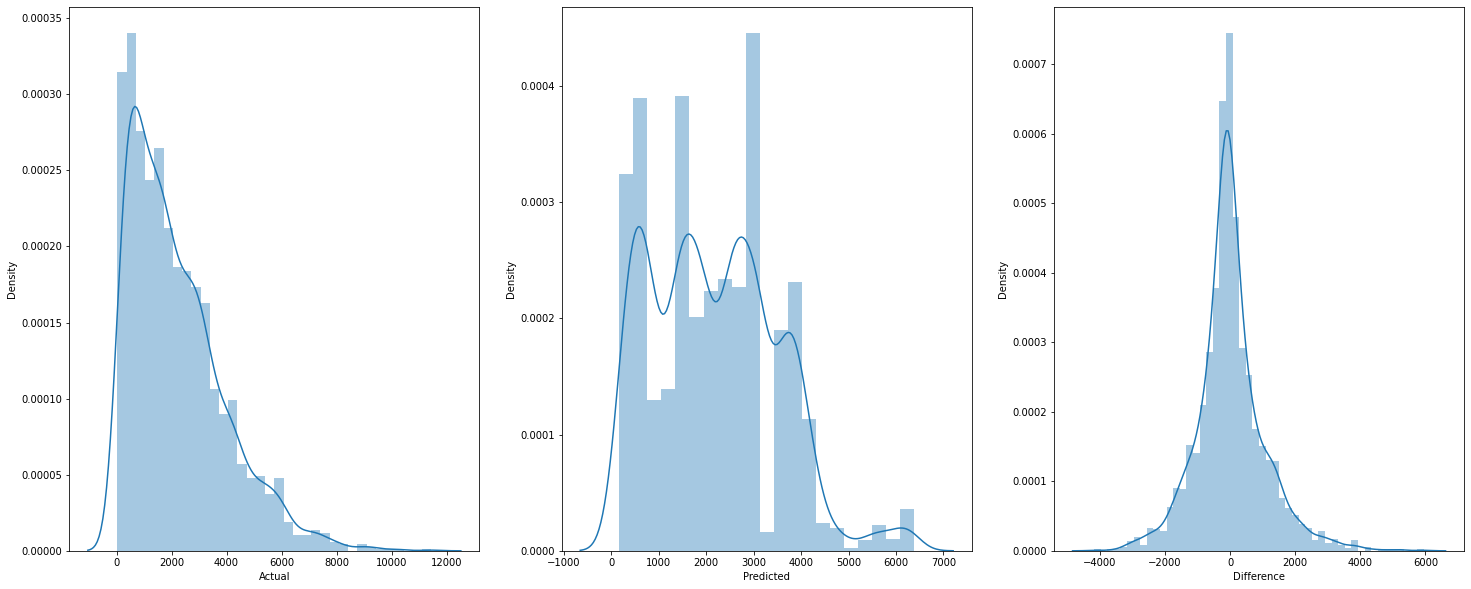

In [165]:
fig , axes = plt.subplots(1 , 3 , figsize = (25,10))
for i , ax in zip(['Actual' , 'Predicted' , 'Difference'] , axes.flatten()):
  sns.distplot(x = fin2[i] , ax = ax)
  ax.set_xlabel(i)

In [166]:
x_train1.to_csv('x_train1.csv')
y_train1.to_csv('y_train1.csv')

x_test1.to_csv('x_test1.csv')
y_test1.to_csv('y_test1.csv')

pd.DataFrame(y_pred_stack).to_csv('y_pred_stack.csv')